<a href="https://colab.research.google.com/github/Arooj-Fatima14/Robotics_World-internship-/blob/main/LR_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [2]:
%matplotlib inline

In [3]:
digits = load_digits()

In [6]:
print("images data shape : ", digits.data.shape)
print("images labels shape : ", digits.target.shape)
# print("images labels : ", digits.target)
# print("images images : ", digits.images)

images data shape :  (1797, 64)
images labels shape :  (1797,)


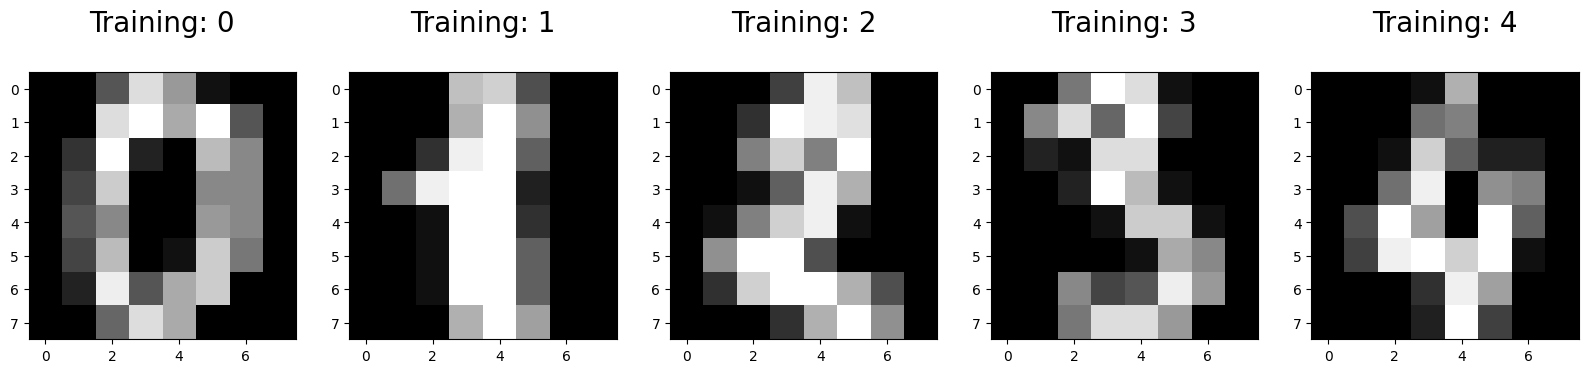

In [7]:
plt.figure(figsize=( 20, 4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 2)


In [27]:
print(X_train.shape)

(1347, 64)


In [28]:
print(X_test.shape)

(450, 64)


In [29]:
print(Y_train.shape)

(1347,)


In [30]:


print(  Y_test.shape)

(450,)


In [31]:
log_r_model = LogisticRegression()
log_r_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
print("predicted value : ", log_r_model.predict(X_test[10].reshape(1, -1)))
print("actual value : ", Y_test[10])

predicted value :  [6]
actual value :  6


In [33]:
score = log_r_model.score(X_test, Y_test)
print("score : ", score)

score :  0.9466666666666667


In [35]:
cm = confusion_matrix(Y_test, log_r_model.predict(X_test))
print(cm)

[[41  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  1  0  0  0  0  2  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  1  2  0]
 [ 0  0  0  0 36  0  0  0  3  1]
 [ 0  1  0  0  1 50  0  0  0  0]
 [ 0  1  0  0  0  0 41  0  1  0]
 [ 0  0  0  0  0  0  0 48  1  0]
 [ 0  0  0  0  0  0  0  0 39  1]
 [ 0  0  0  2  0  1  0  0  2 34]]


In [38]:
predicted_values = log_r_model.predict(X_test[10:50])
actual_values = Y_test[10:50]
print("predicted values: ", predicted_values)
print("actual values:    ", actual_values)

predicted values:  [6 7 6 1 5 5 8 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9 8 4 6 8 8 5 7 9 8 9
 6 1 7]
actual values:     [6 7 6 1 5 5 4 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9 8 4 6 8 8 5 7 9 6 9
 6 1 3]


Text(0.5, 1.0, 'Accuracy Score: 0.9466666666666667')

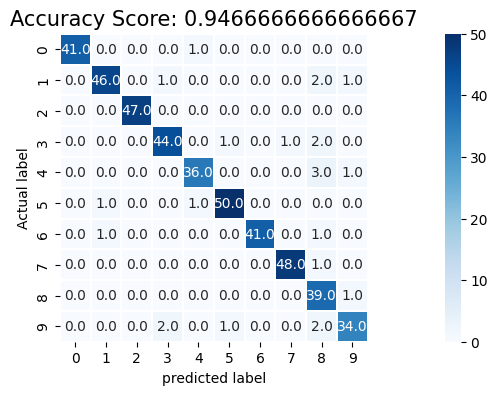

In [45]:
plt.figure(figsize=( 20, 4))
sns.heatmap(cm, annot=True , fmt = ".1f", linewidths = .10 , square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [46]:
predictions = log_r_model.predict(X_test)

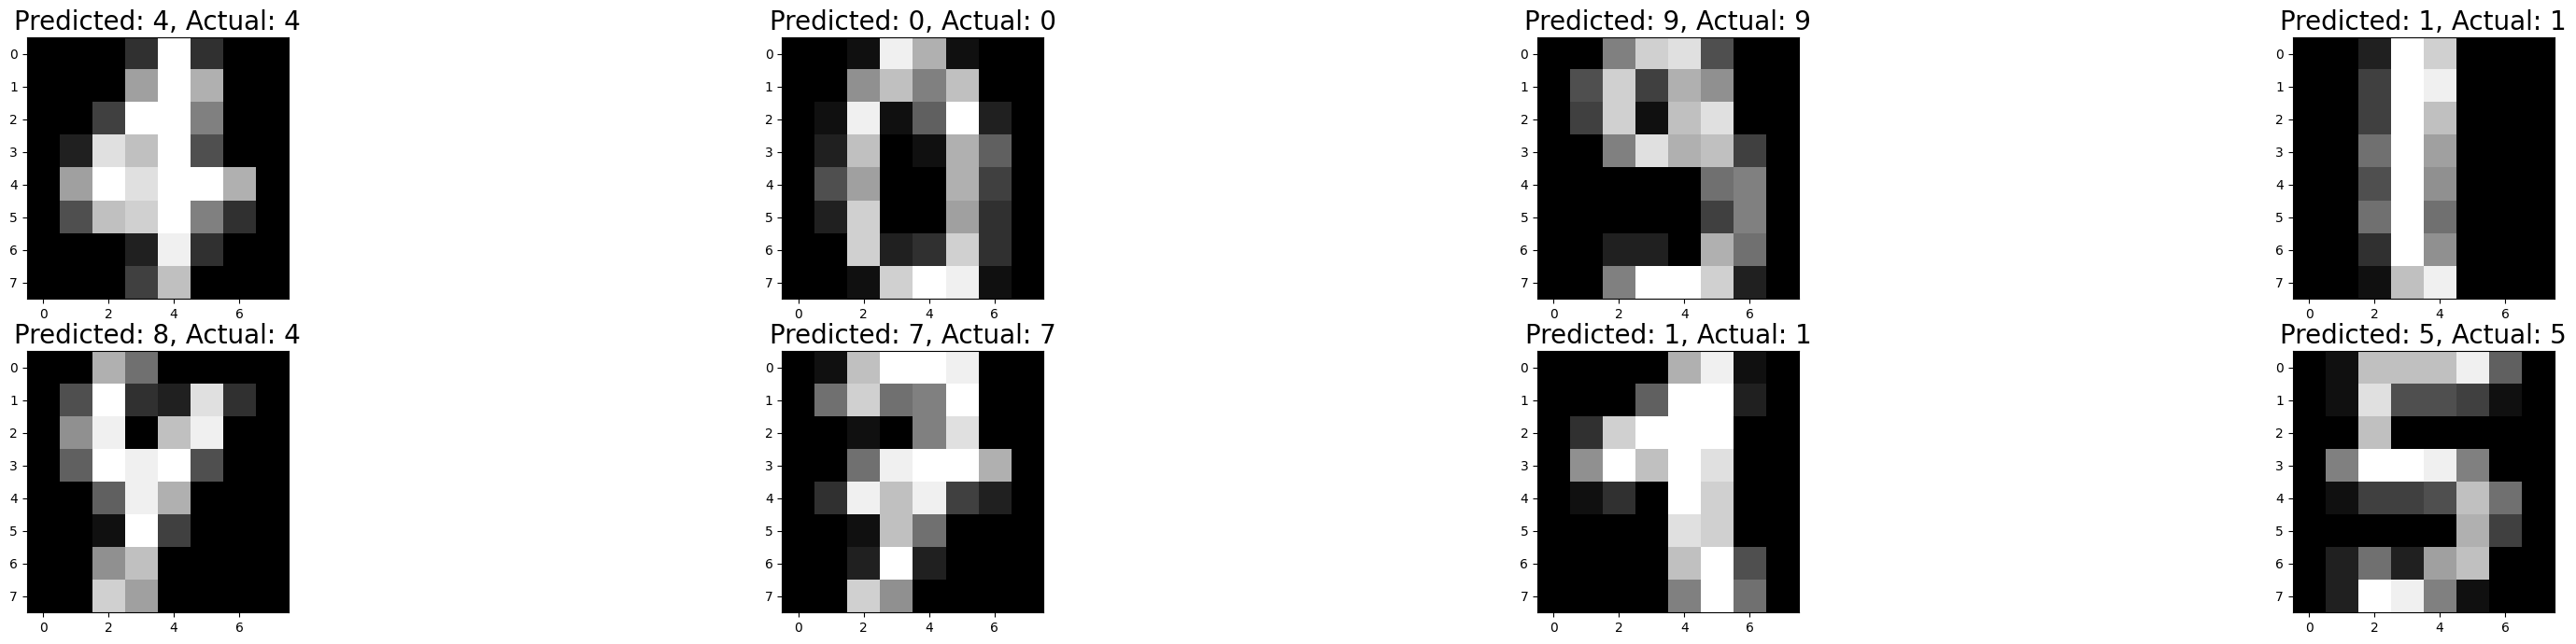

In [57]:
index = 0
classifiedIndex = []
for predict, actual in zip( predictions, Y_test):
    if predict == actual:
        classifiedIndex.append(index)
        index +=1
plt.figure(figsize=(40, 8))
for plotIndex, wrong in enumerate(classifiedIndex[0:8]) :
    plt.subplot(2, 4, plotIndex + 1)
    plt.imshow(np.reshape(X_test[wrong], (8, 8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format( predictions[wrong], Y_test[wrong]), fontsize = 20)